In [2105]:
# Импорт библиотек для анализа данных
import pandas as pd
# import numpy as np

In [2106]:
# Загрузка данных
data = pd.read_csv('data/titanic_full_cleared.csv', header=0)

In [2107]:
# Преобразование к int8
data = data.astype('int8')

In [2108]:
# Настройки вывода
# Метод вывода для объекта pd.DataFrame
def _repr_html_styled_(self):
    styled_data = self.style.set_table_styles([
        {
            # Заголовки таблиц и индексы
            'selector': 'th', 
            'props': [
                ('font-family', 'Cascadia Code Light'),     # шрифт 
                ('font-weight', 'normal'),                  # толщина текста
                ('color', '#e5ce5c'),                       # цвет текста
                ('opacity', '1'),                           # прозрачность текста
                ('background-color', '#192d37'),            # цфет фона
                ('padding', '5px'),                         # отступы                
             ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#828f9a'),
            ]
        },
        {
            # Содержимое ячеек
            'selector': 'td', 
            'props': [
                ('font-family', 'Cascadia Code Light'), 
                ('padding', '5px')
            ]
        },
        {
            # Четные строки содержимого таблицы
            'selector': 'tbody tr:nth-child(even)', 
            'props': [
                ('background-color', '#ffffff00')  # нет цвета ("прозрачные")
            ]
        },
        {
            # Цвет фона для нечетных строк (начиная со строки заголовка)
            'selector': 'tr:nth-of-type(odd)', 
            'props': [
                ('background-color', '#ffffff0a')
            ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#828f9a'),
            ]
        },
        {
            # Hover эффект для ячейки
            'selector': 'td:hover',
            'props': [
                ('background-color', '#ffffff14'),
            ]
        },
          
    ])

    return styled_data._repr_html_() # возврат HTML-представления стилизованных данных


# Переопределение метода вывода объекта pd.DataFrame
pd.DataFrame._repr_html_ = _repr_html_styled_

In [2109]:
# Полный набор данных
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,PersonsInTicket,Cost,FamilySize,IsAlone
0,0,3,0,2,1,0,1,1,1,1,7,2,0
1,1,1,1,3,1,0,4,2,4,2,2,2,0
2,1,3,1,2,0,0,1,1,2,1,8,1,1
3,1,1,1,3,1,0,4,1,4,2,1,2,0
4,0,3,0,3,0,0,1,1,1,1,8,1,1


In [2110]:
# Перемешиваем данные
# data = data.sample(frac=1).reset_index(drop=True)

In [2132]:
# Удаление признаков которые негативно отразились на результатах предсказания
df = data.drop(['SibSp', 'PersonsInTicket', 'FamilySize', 'Cost', 'IsAlone', 'Fare', 'Parch', 'Sex'], axis = 1)

In [2133]:
# Окончательный набор данных
df.head()

,Survived,Pclass,Age,Embarked,Title
0,0,3,2,1,1
1,1,1,3,2,4
2,1,3,2,1,2
3,1,1,3,1,4
4,0,3,3,1,1


In [2134]:
# Определение выборок
train = df.iloc[:891].reset_index(drop=True)    # тренировочная выборка
test = df.iloc[891:].reset_index(drop=True)     # тестовая выборка
X_train = train.drop('Survived', axis=1)        # удаляем столбец Survived из тренировочных данных
y_train = train['Survived']                     # используем столбец Survived как вектор целевых значений
X_test = test.drop('Survived', axis=1)          # удаляем столбец Survived из тестовых данных
y_test = test['Survived']                       # используем столбец Survived как вектор целевых значений

In [2135]:
# Тренировочная выборка X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int8 
 1   Age       891 non-null    int8 
 2   Embarked  891 non-null    int8 
 3   Title     891 non-null    int8 
dtypes: int8(4)
memory usage: 3.6 KB


In [2136]:
# Тренировочная выборка y_train
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int8 
dtypes: int8(1)
memory usage: 1023.0 bytes


In [2137]:
# Тестовая выборка X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int8 
 1   Age       418 non-null    int8 
 2   Embarked  418 non-null    int8 
 3   Title     418 non-null    int8 
dtypes: int8(4)
memory usage: 1.8 KB


In [2138]:
# Тестовая выборка y_test
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int8 
dtypes: int8(1)
memory usage: 550.0 bytes


In [2139]:
# Импорт библиотек для машинного обучения
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score

In [2140]:
# Сравнение классификаторов
# Список классификаторов
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

# Создание DataFrame для хранения результатов работы моделей на тренировочных данных
train_log_cols = ['Classifier', 'Accuracy', 'Precision']
train_log = pd.DataFrame(columns=train_log_cols)

# Цикл перебора классификаторов и оценка их точности с использованием cross_val_score
for clf in classifiers:
    name = clf.__class__.__name__
    accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision').mean()
    train_log_entry = pd.DataFrame([[name, accuracy, precision]], columns=train_log_cols)
    train_log = pd.concat([train_log, train_log_entry], ignore_index=True)

In [2141]:
# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [2142]:
# Установка стиля seaborn
sns.set_theme(style="darkgrid", rc={"figure.facecolor": "#eaeaf2"})

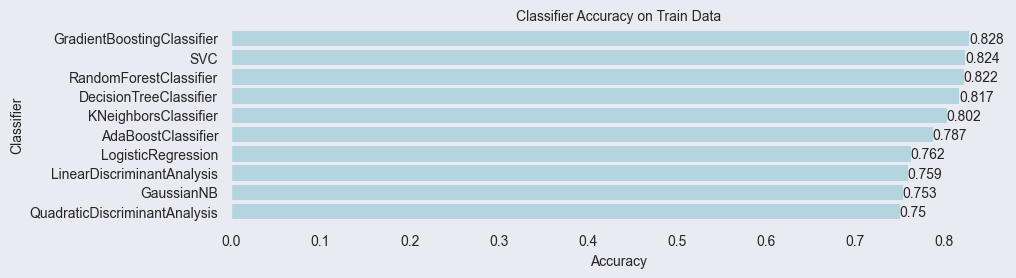

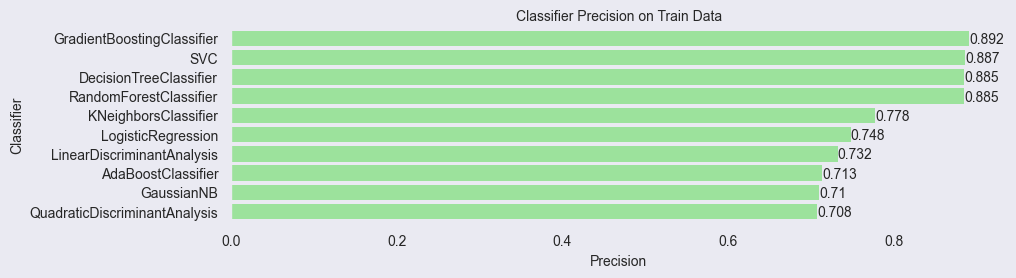

In [2143]:
# Диаграммы сравнения классификаторов на тренировочных данных
# Сортировка данных по убыванию столбца Accuracy
train_log = train_log.sort_values(by='Accuracy', ascending=False)

# Диаграмма доли правильных
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Accuracy', y='Classifier', data=train_log, color='lightblue', linewidth=0)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Accuracy on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения доли правильных ответов в каждый столбец
for index, value in enumerate(train_log['Accuracy']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)

# Сортировка данных по убыванию столбца Precision
train_log = train_log.sort_values(by='Precision', ascending=False)

# Диаграмма точности
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Precision', y='Classifier', data=train_log, color='lightgreen', linewidth=0)
plt.xlabel('Precision', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Precision on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения точности в каждый столбец
for index, value in enumerate(train_log['Precision']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)

In [2144]:
# Импорт библиотек для тонкой настройки моделей
# Класс для поиска оптимальных параметров
from sklearn.model_selection import GridSearchCV
# Классы для нормализации признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
# Класс для упрощения последовательных преобразований данных
from sklearn.pipeline import Pipeline

In [2145]:
# Классификатор SVC с параметрами по-умолчанию
# Создание модели SVC с линейным ядром
sv_clf = SVC(probability=True)

# Обучение модели на тренировочных данных
sv_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = sv_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результата
print('Точность (Precision):', round(precision, 3))
print('Доля правильных ответов (Accuracy):', round(accuracy, 3))

Точность (Precision): 0.809
Доля правильных ответов (Accuracy): 0.789


In [2146]:
# Классификатор DecisionTreeClassifier с параметрами по-умолчанию
# Создание модели DecisionTreeClassifier с линейным ядром
dt_clf = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
dt_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = dt_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результата
print('Точность (Precision):', round(precision, 3))
print('Доля правильных ответов (Accuracy):', round(accuracy, 3))

Точность (Precision): 0.798
Доля правильных ответов (Accuracy): 0.789


In [2147]:
# Классификатор RandomForestClassifier с параметрами по-умолчанию
# Создание модели RandomForestClassifier с линейным ядром
rf_clf = RandomForestClassifier()

# Обучение модели на тренировочных данных
rf_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = rf_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результата
print('Точность (Precision):', round(precision, 3))
print('Доля правильных ответов (Accuracy):', round(accuracy, 3))

Точность (Precision): 0.798
Доля правильных ответов (Accuracy): 0.789


In [2148]:
# Классификатор GradientBoostingClassifier с параметрами по-умолчанию
# Создание модели GradientBoostingClassifier с линейным ядром
gb_clf = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_clf.fit(X_train, y_train)

# Предсказание результатов на тестовых данных
y_pred = gb_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результата
print('Точность (Precision):', round(precision, 3))
print('Доля правильных ответов (Accuracy):', round(accuracy, 3))

Точность (Precision): 0.798
Доля правильных ответов (Accuracy): 0.789


In [2149]:
# Классификатор SVC с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'probability': [True, False],
    'kernel': ['linear', 'rbf'],    # типы ядер: линейное и RBF
    'C': [10],              # параметр регуляризации
    'gamma': [0.1]         # параметр ядра (для RBF)
}

# Создание объекта GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Обучение (тренировка) модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print('Наилучшие найденные параметры:', best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных (эти данные модель не видела при обучении)
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Точность (Precision):', round(precision, 3))
print('Доля правильных ответов (Accuracy):', round(accuracy, 3))

Наилучшие найденные параметры: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Точность (Precision): 0.798
Доля правильных ответов (Accuracy): 0.789


In [2150]:
# Классификатор DecisionTreeClassifier с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Создание экземпляра GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Наилучшие найденные параметры:", best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Точность (Precision):", round(precision, 3))
print("Доля правильных ответов (Accuracy):", round(accuracy, 3))

# Оценка важности признаков
importances = best_model.feature_importances_

# Создание DataFrame для удобства анализа результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print("Важность признаков:")
print(feature_importance_df)

Наилучшие найденные параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Точность (Precision): 0.792
Доля правильных ответов (Accuracy): 0.787
Важность признаков:
    Feature  Importance
3     Title    0.721537
0    Pclass    0.235176
2  Embarked    0.037683
1       Age    0.005604


In [2151]:
# Классификатор GradientBoostingClassifier с подбором параметров
# Сетка параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Создание экземпляра GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Наилучшие найденные параметры:", best_params)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание результатов на тестовых данных
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Точность (Precision):", round(precision, 3))
print("Доля правильных ответов (Accuracy):", round(accuracy, 3))

# Оценка важности признаков
importances = best_model.feature_importances_

# Создание DataFrame для удобства анализа результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print("Важность признаков:")
print(feature_importance_df)

Наилучшие найденные параметры: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Точность (Precision): 0.798
Доля правильных ответов (Accuracy): 0.789
Важность признаков:
    Feature  Importance
3     Title    0.693066
0    Pclass    0.225454
2  Embarked    0.061819
1       Age    0.019662
